In [1]:
import ROOT
import rootnotes
c1 = rootnotes.default_canvas()

In [2]:
identifier = "vbfWW" # avaliable: ggfWW, vbfWW, vbfZZ, ggfZZ, vbfMuMu 
infilename = "/eos/user/v/vcroft/morphingInputs/vbfhwwlvlv_3d.root" # give the input file name here
observable = "twoSelJets/dphijj" # name of the observable to be used (histogram name)

names of input samples

In [3]:
samplelist = ["kAwwkHwwkSM0","kAwwkHwwkSM1","kAwwkHwwkSM10","","kAwwkHwwkSM11","kAwwkHwwkSM12","kAwwkHwwkSM13","kAwwkHwwkSM2","kAwwkHwwkSM3","kAwwkHwwkSM4","kAwwkHwwkSM5","kAwwkHwwkSM6","kAwwkHwwkSM7","kAwwkHwwkSM8","kAwwkHwwkSM9","kSM0"]
# these are the validation samples: "v0","v1","v2","v3","v4","v5","v6","v7","v8","v9"

Set up morphing function with workspace

first we set up a workspace factory object. The long string defines the ROOT morphing function from root the rest is name, location of the inputs, variable and all the parameters. 

I print the workspace to make sure it reads it ok.

In [4]:
w = ROOT.RooWorkspace("w","morphfunc")
wsstr = "RooHC"+identifier+"MorphFunc::"+identifier+"('"+infilename+"','"+observable+"','"+samplelist[0]+"',{"+",".join(["'"+x+"'" for x in samplelist])+"})"
w.factory(wsstr)
w.Print()

now make the function from the factory object

In [5]:
morphfunc = w.obj(identifier)
if not morphfunc:
    print("failure to create morphing function!")
else:
    print "writing workspace"
    w.writeToFile("workspace.root",True)

writing workspace


get morphfunc from workspace

In [6]:
workspacefile = ROOT.TFile.Open("workspace.root","READ")
w = workspacefile.Get("w")
morphfunc = w.obj(identifier)
workspacefile.Close()

TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=147457 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=13963 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=14257 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=14561 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=14890 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=15217 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=15562 pointer will be 0
TBufferFile::CheckObject:0: RuntimeWarning: reference to object of unavailable class TObject, offset=15898 pointer will be 0

morph to the validation sample v1

In [7]:
validationsample = "v1"
morphfunc.setParameters(validationsample)
morphing = morphfunc.createTH1("morphing")

open the input file to get the validation histogram for comparison

In [8]:
tfile = ROOT.TFile.Open(infilename,"READ")
folder = tfile.Get(validationsample)
validation = folder.FindObject(observable)
validation.SetDirectory(0)
validation.SetTitle(validationsample)
tfile.Close()

setup the fit

In [9]:
target = ROOT.RooLagrangianMorphFunc.makeDataHistogram(validation,morphfunc.getObservable(),"validation") # convert the target to a RooDataHist
morphfunc.setParameters(validationsample)
morphfunc.setParameterConstant("Lambda",True)
morphfunc.setParameterConstant("cosa",True)
morphfunc.randomizeParameters(2) # randomize the parameters by 2 standard deviations to give the fit something to do
morphfunc.printParameters()
morphfunc.getPdf().fitTo(target,ROOT.RooFit.SumW2Error(True),ROOT.RooFit.Optimize(False)) # run the fit
morphfunc.printParameters()
fitresult = morphfunc.createTH1("fit result")

make the plot

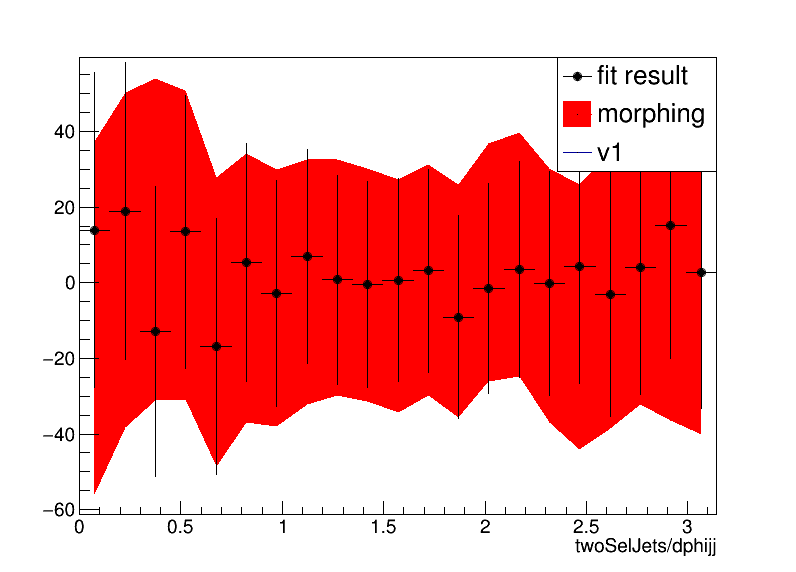

In [10]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
morphing.GetXaxis().SetTitle(observable)
morphing.SetLineColor(2)
morphing.SetFillColor(2)
morphing.Draw("E3")
fitresult.SetLineColor(1);
fitresult.SetMarkerColor(1);
fitresult.SetMarkerStyle(20);
fitresult.Draw("PSAME");
validation.Draw("SAME")
leg = ROOT.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(fitresult)
leg.AddEntry(morphing)
leg.AddEntry(validation)
leg.Draw()
c1